Predicting heart disease using machine learning

The dataset is from www.archive.ics.uci.edu/ml/datasets/heart+Disease
Also from www.kaggle.com/ronitf/geart-disease-uci
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

#Models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ZTM Course/End-to-End Heart Disease Classification/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

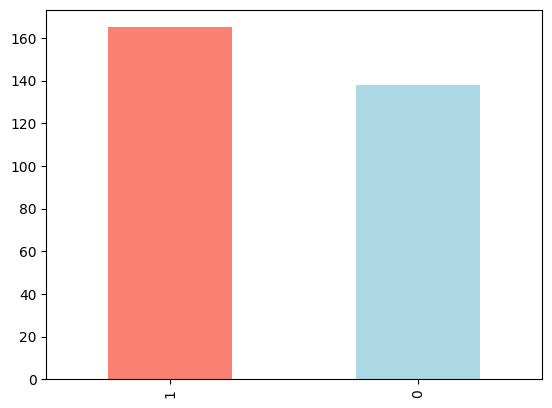

In [4]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
   #Heart disease according to sex
   df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
#Comparing target columns with the sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

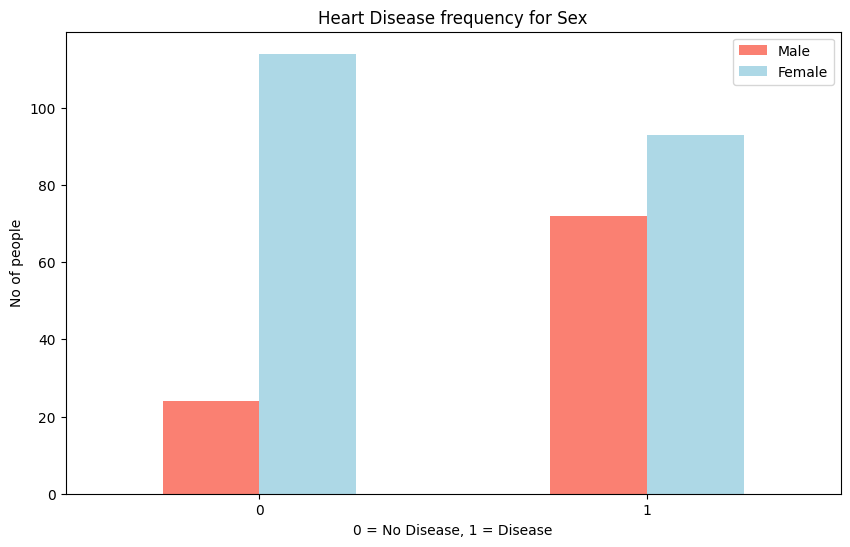

In [10]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("No of people")
plt.legend({"Female", "Male"})
plt.xticks(rotation=0)

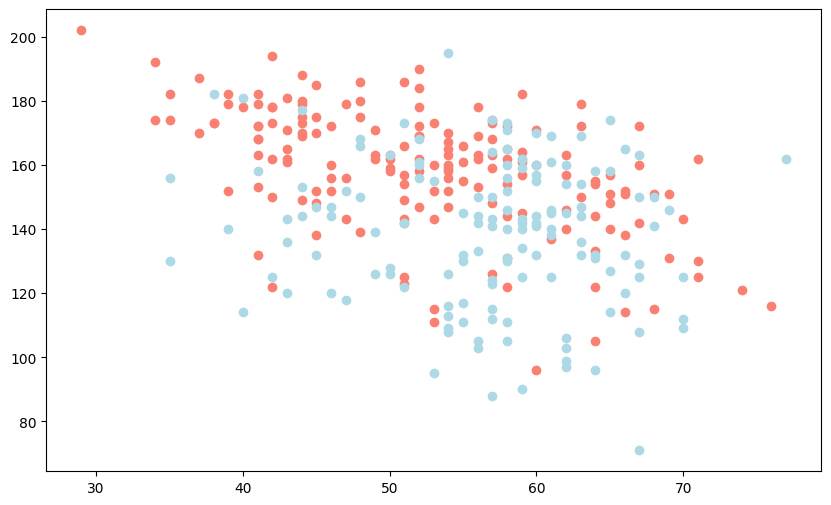

In [11]:
#Create another figure
plt.figure(figsize=(10, 6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

<Axes: ylabel='Frequency'>

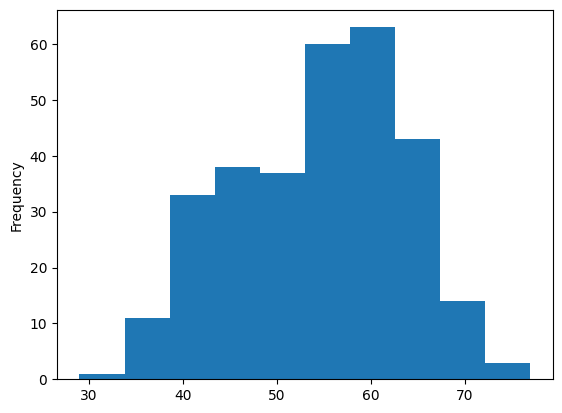

In [12]:
df.age.plot.hist()

In [13]:
#Heart Disease Frequency per Chest Pain Type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

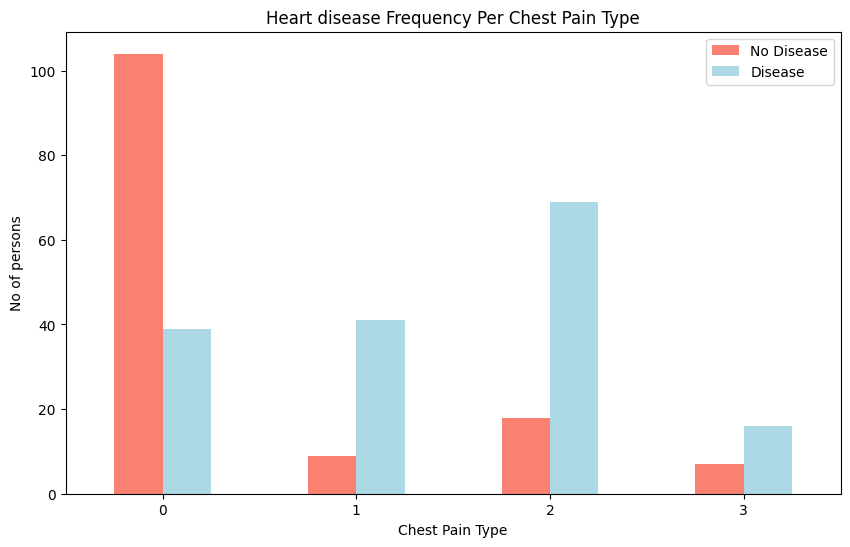

In [14]:
#Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=['salmon', "lightblue"])

#Add some communication
plt.title("Heart disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("No of persons")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [15]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


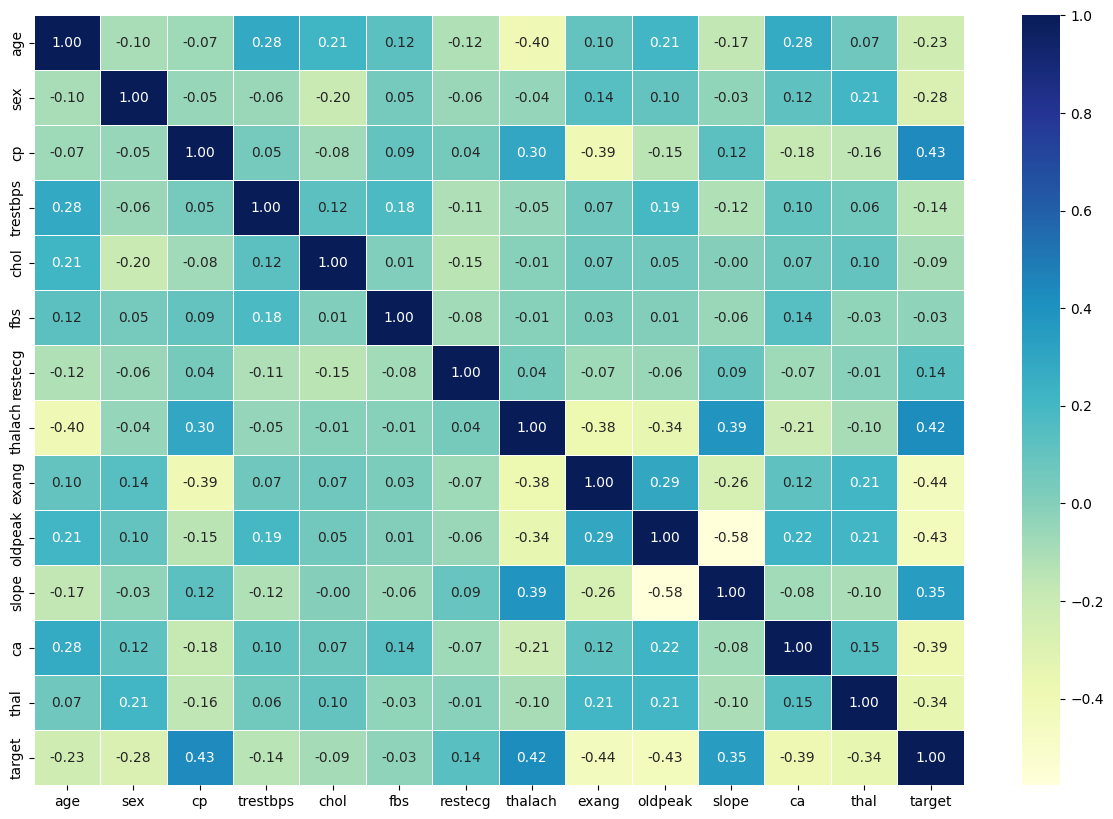

In [16]:
#Let's make the correlation matrix a little more pretty
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [17]:
#MODELLING
#Splitting data
x = df.drop("target", axis=1)

y = df["target"]

In [18]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
#Splitting into train and test data sets
np.random.seed(42)

#Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [22]:
#|Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
  #Set random seed
  np.random.seed(42)
  #Make dictionary to keep model scores
  model_scores = {}
  #Loop through models
  for name, model in models.items():
    #Fit model to the data
    model.fit(x_train, y_train)
    #Evaluate and append it's score to model_scores
    model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442}

In [24]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)
modelLR.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [25]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(x_train, y_train)
modelKNN.score(x_test, y_test)

0.6885245901639344

In [27]:
modelRF = RandomForestClassifier(x_train, y_train)
modelRF.fit(x_train, y_train)
modelRF.score(x_test, y_test)

TypeError: ignored

In [28]:
#Let's tune KNN (by hand)

train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Set up KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #Fit algorithm
  knn.fit(x_train, y_train)

  #Update the training scores list
  train_scores.append(knn.score(x_train, y_train))

  #Update the test scores list
  test_scores.append(knn.score(x_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


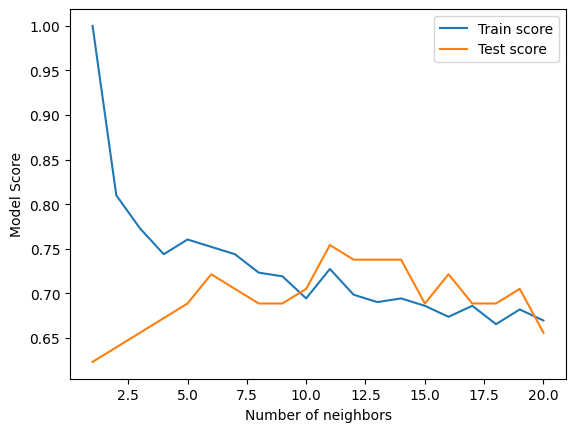

In [33]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

HYPERPARAMETER TUNING USING RANDOMIZEDCV

In [34]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                'solver': ["liblinear"]}

#Create yperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_lead": np.arange(1, 20, 2)}

In [35]:
# Tune Logistic Regression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit the random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [39]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: ignored

In [54]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: ignored

In [40]:
#look into 166

In [42]:
#Find the best hyperparameters
rs_rf.best_params_

AttributeError: ignored

In [43]:
#Find the best hyperparameters
rs_rf.cv_results_

AttributeError: ignored

In [44]:
rs_rf.score(x_test, y_test)

NotFittedError: ignored

GridSearchCV

In [48]:
#Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-1, 4, 30),
                "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit hyperparameter grid model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-01, 1.48735211e-01, 2.21221629e-01, 3.29034456e-01,
       4.89390092e-01, 7.27895384e-01, 1.08263673e+00, 1.61026203e+00,
       2.39502662e+00, 3.56224789e+00, 5.29831691e+00, 7.88046282e+00,
       1.17210230e+01, 1.74332882e+01, 2.59294380e+01, 3.85662042e+01,
       5.73615251e+01, 8.53167852e+01, 1.26896100e+02, 1.88739182e+02,
       2.80721620e+02, 4.17531894e+02, 6.21016942e+02, 9.23670857e+02,
       1.37382380e+03, 2.04335972e+03, 3.03919538e+03, 4.52035366e+03,
       6.72335754e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [52]:
##evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

Evaluting our tuned machine learning classifier, beyond accuracy
ROC curve and AUC score
Confusion matrix
Classification report
Precision
Recall
F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [55]:
#Make predictions for tuned model
y_preds = gs_log_reg.predict(x_test)

In [56]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [57]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

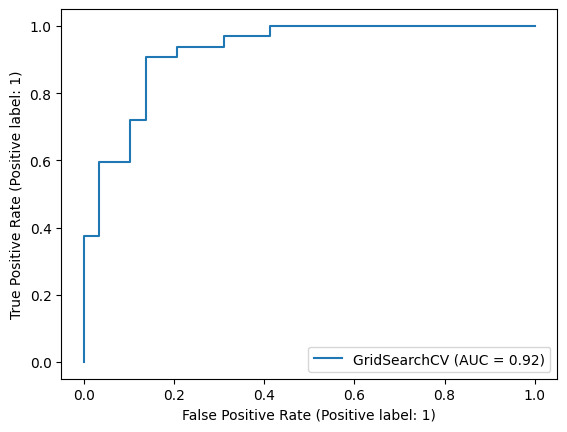

In [62]:
#Plot ROC and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [63]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


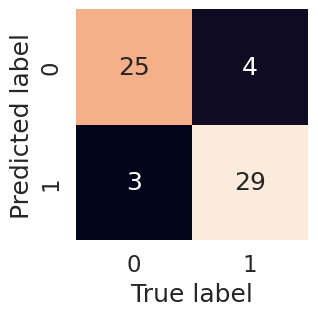

In [65]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
  """
  Plots a nice looking confusion matrix using seaborn heatmap
  """

  fig, ax = plt.subplots(figsize=(3, 3))
  ac = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)

  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_matrix(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [66]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [67]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [69]:
#Create a new classifier with new parameters
clf = LogisticRegression(C=0.2212216291070449,
                         solver="liblinear")

In [70]:
#Cross_validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [71]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [74]:
#Cross_validated precision
cv_precision = cross_val_score(clf,
                               x,
                               y,
                               cv=5,
                               scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [75]:
#Cross-validated recall
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [77]:
#Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'Cross-validated classification metrics'}>

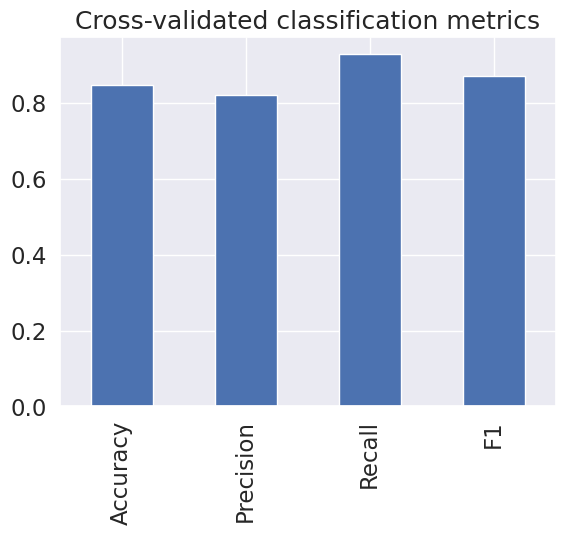

In [81]:
#Visualize cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)

Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [82]:
#Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.2212216291070449,
                         solver="liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.2212216291070449, solver='liblinear')

In [83]:
#Check coefficient
clf.coef_

array([[ 0.00348354, -0.88559313,  0.6692227 , -0.01160079, -0.001685  ,
         0.04648658,  0.32645411,  0.02466732, -0.61967584, -0.57313636,
         0.46276587, -0.64561816, -0.69121355]])

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0034835426131471763,
 'sex': -0.8855931337581155,
 'cp': 0.6692226961496021,
 'trestbps': -0.011600787499313711,
 'chol': -0.0016850027266994956,
 'fbs': 0.046486580947070796,
 'restecg': 0.32645410877370834,
 'thalach': 0.024667315723039693,
 'exang': -0.6196758409270574,
 'oldpeak': -0.5731363645217727,
 'slope': 0.4627658691436633,
 'ca': -0.6456181575503567,
 'thal': -0.6912135456343571}

<Axes: title={'center': 'Feature Importance'}>

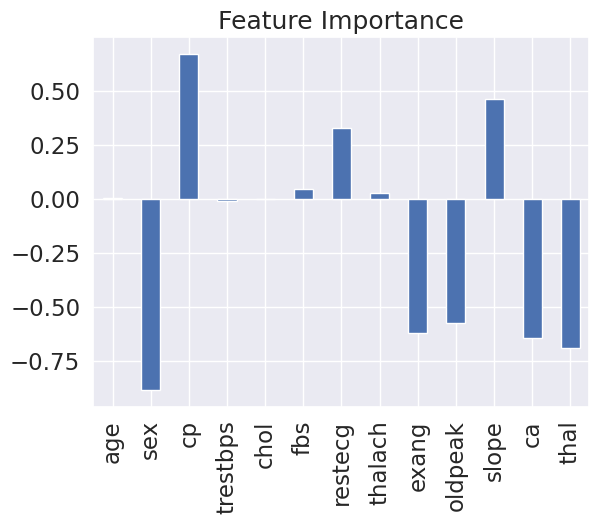

In [87]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [88]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [89]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart